In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import VarianceThreshold,f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [2]:
data = pd.read_csv('train1.csv')
data

,A apol,A AMR,A nH,A nC,A nN,A nO,A nS,A MW,A nBondsD,A nBonds,...,B ETA_dEpsilon_A,B ETA_dAlpha_B,B ETA_BetaP,B FMF,B fragC,B HOMO,B LOMO,B Bandgap,Time (s),Potential (v)
0,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,15,0.2467
1,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,35,0.2481
2,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,55,0.2380
3,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,75,0.2292
4,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,95,0.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,44.469516,90.6166,12,16,2,4,1,328.051778,11,25,...,0.30944,0.02396,1.53125,0.528736,1009.24,-5.040,-4.830,0.210,15,0.2517
386,44.469516,90.6166,12,16,2,4,1,328.051778,11,25,...,0.30944,0.02396,1.53125,0.528736,1009.24,-5.040,-4.830,0.210,35,0.2537
387,44.469516,90.6166,12,16,2,4,1,328.051778,11,25,...,0.30944,0.02396,1.53125,0.528736,1009.24,-5.040,-4.830,0.210,55,0.2463
388,44.469516,90.6166,12,16,2,4,1,328.051778,11,25,...,0.30944,0.02396,1.53125,0.528736,1009.24,-5.040,-4.830,0.210,75,0.2390


In [3]:
data.shape

(390, 64)

In [4]:
X=data.values[:,:-1] #输入数据归一化

for i in range(X.shape[1]):
    X[:,[i]] = preprocessing.MinMaxScaler().fit_transform(X[:,[i]])
    
y=data.values[:,-1] #目标数值
# x,y=writer(return_counts=True)

In [5]:
model=RandomForestRegressor()
rfe=RFE(estimator=model,n_features_to_select=23,step=1)
rfe_X=rfe.fit_transform(X,y)
print("特征是否被选中：\n",rfe.support_)
print("获取的数据特征尺寸:",rfe_X.shape)

特征是否被选中：
 [False False False False  True  True False  True False False False False
 False False  True False  True  True False  True False False False  True
  True False  True False False  True  True False False  True False False
 False False False False False False False False False False False  True
 False False False  True  True  True False  True  True False False  True
  True  True  True]
获取的数据特征尺寸: (390, 23)


In [6]:
Features_0=pd.DataFrame(data=data.columns,columns=['Features'])
Features_0=Features_0.drop(axis=0,index=63)
Features_0

,Features
0,A apol
1,A AMR
2,A nH
3,A nC
4,A nN
...,...
58,B fragC
59,B HOMO
60,B LOMO
61,B Bandgap


In [7]:
Features_rfe=pd.DataFrame(data=rfe.support_,columns=['whether selected'])
Features_rfe

,whether selected
0,False
1,False
2,False
3,False
4,True
...,...
58,False
59,True
60,True
61,True


In [8]:
pd.options.display.max_rows=None
p= pd.concat([Features_0, Features_rfe], axis=1)
p

,Features,whether selected
0,A apol,False
1,A AMR,False
2,A nH,False
3,A nC,False
4,A nN,True
5,A nO,True
6,A nS,False
7,A MW,True
8,A nBondsD,False
9,A nBonds,False


In [9]:
q = p['Features'] * p['whether selected']
r = pd.concat([p, q], axis=1)
r.rename(columns={0:'remain'},inplace=True)
r

,Features,whether selected,remain
0,A apol,False,
1,A AMR,False,
2,A nH,False,
3,A nC,False,
4,A nN,True,A nN
5,A nO,True,A nO
6,A nS,False,
7,A MW,True,A MW
8,A nBondsD,False,
9,A nBonds,False,


In [10]:
s = pd.DataFrame(r.remain)
s

,remain
0,
1,
2,
3,
4,A nN
5,A nO
6,
7,A MW
8,
9,


In [11]:
s = s.drop_duplicates()
s

,remain
0,
4,A nN
5,A nO
7,A MW
14,A Sare
16,A Si
17,A Mv
19,A Mpe
23,A ETA_dEpsilon_A
24,A ETA_dAlpha_B


In [15]:
s = s.drop(axis=0,index=0)
s

,remain
4,A nN
5,A nO
7,A MW
14,A Sare
16,A Si
17,A Mv
19,A Mpe
23,A ETA_dEpsilon_A
24,A ETA_dAlpha_B
26,A FMF


In [16]:
s = s.reset_index(drop=True)
s

,remain
0,A nN
1,A nO
2,A MW
3,A Sare
4,A Si
5,A Mv
6,A Mpe
7,A ETA_dEpsilon_A
8,A ETA_dAlpha_B
9,A FMF


In [17]:
s.remain.values

array(['A nN', 'A nO', 'A MW', 'A Sare', 'A Si', 'A Mv', 'A Mpe',
       'A ETA_dEpsilon_A', 'A ETA_dAlpha_B', 'A FMF', 'A LOMO',
       'A Bandgap', 'B nH', 'B Si', 'B Mare', 'B Mp', 'B Mi',
       'B ETA_dAlpha_B', 'B ETA_BetaP', 'B HOMO', 'B LOMO', 'B Bandgap',
       'Time (s)'], dtype=object)

# 选择rfe后的列，打印，关键！

In [18]:
t = pd.DataFrame(data=data,columns=s.remain.values)
t.head()

,A nN,A nO,A MW,A Sare,A Si,A Mv,A Mpe,A ETA_dEpsilon_A,A ETA_dAlpha_B,A FMF,...,B Si,B Mare,B Mp,B Mi,B ETA_dAlpha_B,B ETA_BetaP,B HOMO,B LOMO,B Bandgap,Time (s)
0,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,15
1,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,35
2,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,55
3,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,75
4,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,95


# 定义特征和目标

In [28]:
X = t
y = data[['Potential (v)']]

# 数据切分

In [29]:
from sklearn.model_selection import train_test_split

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, 
#                                                               y, 
#                                                               random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
#                                                       y_train_full, random_state=42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42)

# 数据标准化

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 机器学习建模

# 神经网络 RandomSearchCV
## 设置随机种子

In [35]:
# 要求Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)

# 要求Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 定义存储函数
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(result_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_random_seed(42)

## 定义模型构建函数

In [49]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[23]):
    model = keras.models.Sequential()
    # 输入层
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    # 构建多层隐藏层
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    # 输出层
    model.add(keras.layers.Dense(1))
    # 优化器
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    # 模型编译
    model.compile(loss="mse", optimizer=optimizer)
    return model

# 实现 Scikit-Learn 回归器接口

In [50]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

## 模型训练

In [51]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 292 samples, validate on 98 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
292/292 [==============================] - 1s 3ms/sample - loss: 0.8273 - val_loss: 0.7559
Epoch 2/100
292/292 [==============================] - 0s 27us/sample - loss: 0.4486 - val_loss: 0.4669
Epoch 3/100
292/292 [==============================] - 0s 34us/sample - loss: 0.2856 - val_loss: 0.3089
Epoch 4/100
292/292 [==============================] - 0s 27us/sample - loss: 0.1991 - val_loss: 0.2279
Epoch 5/100
292/292 [==============================] - 0s 34us/sample - loss: 0.1564 - val_loss: 0.1874
Epoch 6/100
292/292 [==============================] - 0s 31us/sample - loss: 0.1354 - val_loss: 0.1573
Epoch 7/100
292/292 [==============================] - 0s 31us/sample - loss: 0.1199 - val_loss: 0.1364
Epoch 8/100
292/292 [==============================] - 0s 31us/sample - loss: 0.1094 - val_loss: 0.1220
Epoch 9/100
292/292 [==============================] - 0s 31us/sample - loss

In [52]:
mse_test = keras_reg.score(X_test, y_test)

98/98 [==============================] - 0s 41us/sample - loss: 0.0216


In [53]:
y_pred = keras_reg.predict(X_test[:3])
y_pred

array([0.33995354, 0.26619762, 0.20310533], dtype=float32)

In [54]:
np.random.seed(42)
tf.random.set_random_seed(42)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [1, 2, 3, 50, 100, 200],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=10, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=20)])

In [57]:
rnd_search_cv.best_params_

{'n_neurons': 93, 'n_hidden': 3, 'learning_rate': 0.007365321562258919}

In [58]:
rnd_search_cv.best_score_

-0.012330065295100213

In [59]:
rnd_search_cv.score(X_test, y_test)
model = rnd_search_cv.best_estimator_.model
model

98/98 [==============================] - 0s 317us/sample - loss: 0.0141


In [60]:
model.evaluate(X_test, y_test)

98/98 [==============================] - 0s 286us/sample - loss: 0.0141


0.014109041142676557

In [85]:
y_prediction=model.predict(X_test)
pd.DataFrame(y_prediction).head()

,0
0,0.272817
1,0.303047
2,0.161174
3,0.370022
4,0.195161


R2: Potential (v)    0.792157
dtype: float64
RMSE: 0.1187814813711375
MAE: 0.08465710386697126
R2b: 0.11145083647689569
MSE: 0.014109040316721886


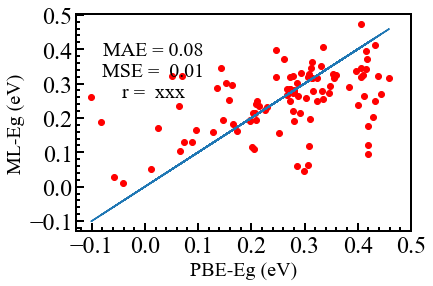

In [86]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


# y_prediction=model.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst
# r = pearsonr(y_test, y_prediction)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)

print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r',alpha=1)
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
ax.xaxis.set_ticks([-0.1,0,0.1,0.2,0.3,0.4,0.5])
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
ax.yaxis.set_ticks([-0.1,0,0.1,0.2,0.3,0.4,0.5])
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(0.02, 0.2, 'MAE = %.2f \nMSE =  %.2f \nr =  xxx \n' % (MAE, MSE), fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-test.tif', dpi=300, bbox_inches = 'tight')
plt.show()

# Xgboost

R2: Potential (v)    0.792157
dtype: float64
RMSE: 0.05332500014965943
MAE: 0.03230449185297197
R2b: 0.820920563731545
MSE: 0.002843555640961178


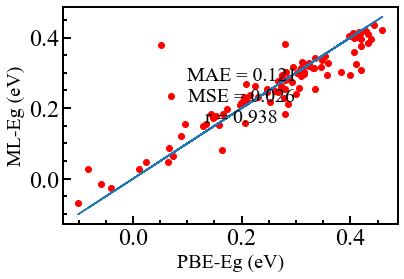

In [93]:
#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

clf = XGBRegressor(n_estimators=2000, max_depth=100, eta=0.1, gamma=0, subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
# sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
# print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(0.2, 0.1, 'MAE = 0.121\nMSE = 0.026\nr = 0.938\n', fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-test.tif', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# Xgoost默认超参数

R2: Potential (v)    0.792157
dtype: float64
RMSE: 0.05657895754253346
MAE: 0.035527919207060214
R2b: 0.7983984482092806
MSE: 0.003201178436599804


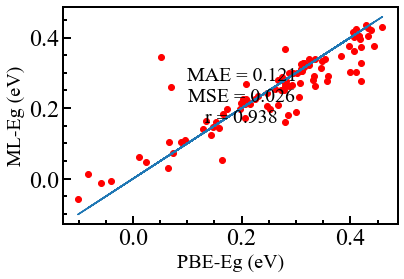

In [94]:
#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
# sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
# print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(0.2, 0.1, 'MAE = 0.121\nMSE = 0.026\nr = 0.938\n', fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-test.tif', dpi=300, bbox_inches = 'tight')
plt.show()

## 尝试random search

In [96]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'n_estimators':range(80,200,4),
        'max_depth':range(2,15,1),
        'learning_rate':np.linspace(0.01,2,20),
        'subsample':np.linspace(0.7,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }

rnd_search_cv = RandomizedSearchCV(clf, param_distribs, n_iter=300, cv=10, scoring='neg_mean_squared_error')
rnd_search_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimat...
       1.58105263, 1.68578947, 1.79052632, 1.89526316, 2.        ]),
                                        'max_depth': range(2, 15),
            

In [98]:
rnd_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5533333333333333,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3242105263157895,
             max_delta_step=0, max_depth=13, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=152, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
rnd_search_cv.best_score_

-0.0023923037277021864

In [102]:
rnd_search_cv.score(X_test, y_test)

-0.0031839947710625366

In [118]:
rnd_search_cv.

'neg_mean_squared_error'

In [141]:
y_prediction=rnd_search_cv.predict(X_test)

In [161]:
y_prediction.shape

(98,)

In [186]:
y_prediction=pd.DataFrame(y_prediction)
y_prediction.reset_index(drop=True)
y_prediction=y_prediction.astype('float64')

In [185]:
y_test.shape
y_test.reset_index(drop=True)
y_test.dtypes

Potential (v)    float64
dtype: object

In [231]:
# z = pd.concat([y_prediction,y_test],axis=1,ignore_index=True)
z = pd.merge(y_prediction, y_test, left_index=True, right_index=True).reset_index(drop=True)
z

,0,Potential (v)
0,0.251329,0.24670
1,0.437785,0.22920
2,0.399796,0.27330
3,0.062920,0.27840
4,0.214187,0.09530
5,0.228348,0.08921
6,0.360661,0.06560
7,0.352888,0.07323
8,0.269950,0.30640
9,0.356024,0.21460


In [232]:
z.corr()

,0,Potential (v)
0,1.000000,-0.076132
Potential (v),-0.076132,1.000000


r: -0.07613171447728101
RMSE: 0.05642689758495089
MAE: 0.03398905746902928
R2: 0.7994806289456489
MSE: 0.0031839947710625366


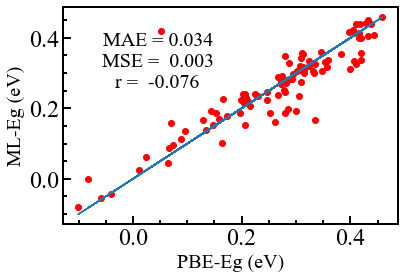

In [240]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)

# r = pearsonr(y_test, y_prediction)
r=z.corr().iloc[[0],[1]].values[0][0]

print("r:",r)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("RMSE:",rmse)
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2 = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2:",R2)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
# ax.xaxis.set_ticks([0,10,20])
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
# ax.yaxis.set_ticks([0,10,20])
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(.05, .2, 'MAE = %.3f \nMSE =  %.3f \nr =  %.3f \n' % (MAE, MSE, r), fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-test.tif', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# import numpy
# def cal_pccs(X, Y):
#         XMean = numpy.mean(X)
#         YMean = numpy.mean(y)
#         #标准差
#         XSD = numpy.std(X)
#         YSD = numpy.std(Y)
#         #z分数
#         ZX = (X-XMean)/XSD
#         ZY = (Y-YMean)/YSD#相关系数
#         r = numpy.sum(ZX*ZY)/(len(X))
#         return(r)
    
# cal_pccs(z[0], z['Potential (v)'])

# random search CV  随机森林模型

In [242]:
X.head()

,A nN,A nO,A MW,A Sare,A Si,A Mv,A Mpe,A ETA_dEpsilon_A,A ETA_dAlpha_B,A FMF,...,B Si,B Mare,B Mp,B Mi,B ETA_dAlpha_B,B ETA_BetaP,B HOMO,B LOMO,B Bandgap,Time (s)
0,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,15
1,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,35
2,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,55
3,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,75
4,8,0,388.212393,51.944,406.647744,0.633314,0.966852,0.13949,0.02759,0.415094,...,632.183396,1.057048,0.740056,7.525993,0.03222,1.45833,-5.259,-5.033,0.226,95


In [243]:
y.head()

,Potential (v)
0,0.2467
1,0.2481
2,0.2380
3,0.2292
4,0.2200


In [ ]:
X = X.values[:, :]
y = y.values[:, :]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])